(256,)


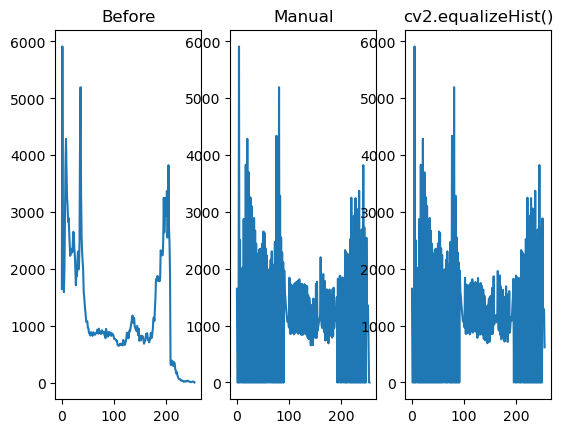

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 대상 영상으로 그레이 스케일로 읽기
img = cv2.imread('../img/yate.jpg', cv2.IMREAD_GRAYSCALE)  # 이미지를 그레이 스케일로 읽어옵니다.
rows, cols = img.shape[:2]  # 이미지의 행(row)과 열(column) 크기를 가져옵니다.

#--② 이퀄라이즈 연산을 직접 적용
hist = cv2.calcHist([img], [0], None, [256], [0, 256])  # 이미지의 히스토그램을 계산합니다.
cdf = hist.cumsum()  # 누적 히스토그램을 계산합니다.
cdf_m = np.ma.masked_equal(cdf, 0)  # 0인 값을 NaN으로 마스킹합니다.
cdf_m = (cdf_m - cdf_m.min()) / (rows * cols) * 255  # 이퀄라이즈된 누적 히스토그램을 계산합니다.
cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # NaN을 다시 0으로 변환하고 uint8 형식으로 변환합니다.
print(cdf.shape)  # 누적 히스토그램의 형태를 출력합니다.
img2 = cdf[img]  # 계산된 히스토그램을 이미지의 픽셀 값에 매핑하여 새로운 이미지 생성

#--③ OpenCV API로 이퀄라이즈 히스토그램 적용
img3 = cv2.equalizeHist(img)  # OpenCV의 equalizeHist() 함수를 사용하여 히스토그램 평활화 적용

#--④ 이퀄라이즈 결과 히스토그램 계산
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])  # 직접 이퀄라이즈한 이미지의 히스토그램 계산
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])  # OpenCV로 이퀄라이즈한 이미지의 히스토그램 계산

#--⑤ 결과 출력
cv2.imshow('Before', img)  # 원본 이미지를 화면에 표시합니다.
cv2.imshow('Manual', img2)  # 직접 이퀄라이즈한 이미지를 화면에 표시합니다.
cv2.imshow('cv2.equalizeHist()', img3)  # OpenCV로 이퀄라이즈한 이미지를 화면에 표시합니다.

#--⑥ 히스토그램을 플로팅하여 출력
hists = {'Before': hist, 'Manual': hist2, 'cv2.equalizeHist()': hist3}
for i, (k, v) in enumerate(hists.items()):  # 각 히스토그램을 반복하여 플로팅합니다.
    plt.subplot(1, 3, i + 1)  # 1행 3열의 서브플롯을 설정합니다.
    plt.title(k)  # 서브플롯의 제목을 설정합니다.
    plt.plot(v)  # 히스토그램을 플로팅합니다.
plt.show()  # 플로팅된 히스토그램을 화면에 표시합니다.

# OpenCV 창을 유지하기 위해 키 입력 대기
cv2.waitKey()
cv2.destroyAllWindows()  # 모든 창을 닫음
